In [1]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

In [2]:
im = skimage.io.imread('BoatsNoise10.pgm')[:,:] / 255.

In [3]:
# Nonlinear diffusion filter

u = im
tau = 0.05

results = []

for i in range(10):
    dy, dx = np.gradient(u)
    
    det_grad2 = dx ** 2.0 + dy ** 2.0
    #g = 1.0 / np.sqrt(det_grad2 + 1e-3)
    g = np.exp(- det_grad2 / (30.0**2))
    
    gip1 = np.vstack([g[1:], g[-1:]])
    gim1 = np.vstack([g[:1], g[:-1]])

    gjp1 = np.hstack([g[:, 1:], g[:, -1:]])
    gjm1 = np.hstack([g[:, :1], g[:, :-1]])

    uip1 = np.vstack([u[1:], u[-1:]])
    uim1 = np.vstack([u[:1], u[:-1]])

    ujp1 = np.hstack([u[:, 1:], u[:, -1:]])
    ujm1 = np.hstack([u[:, :1], u[:, :-1]])
    
    
    
    giphalf = (gip1 + g)*.5
    gimhalf = (gim1 + g)*.5

    gjphalf = (gjp1 + g)*.5
    gjmhalf = (gjm1 + g)*.5
    
    print('1/parent', 1.0/(giphalf + gimhalf + gjphalf + gjmhalf).max())
    
    print((1-tau * (giphalf + gimhalf + gjphalf + gjmhalf)).min())
    
    un = (1-tau * (giphalf + gimhalf + gjphalf + gjmhalf)) * u + tau * (giphalf * uip1 + gimhalf * uim1 + gjphalf * ujp1 + gjmhalf * ujm1)
    
    results += [un]
    u = un

1/parent 0.2500000134830617
0.8000000107864488
1/parent 0.2500000103522565
0.8000000082818048
1/parent 0.25000000352477225
0.8000000028198178
1/parent 0.25000000299903313
0.8000000023992264
1/parent 0.25000000371540665
0.8000000029723253
1/parent 0.25000000287904683
0.8000000023032374
1/parent 0.25000000174525816
0.8000000013962065
1/parent 0.25000000134941625
0.800000001079533
1/parent 0.25000000090580043
0.8000000007246404
1/parent 0.2500000007596503
0.8000000006077203


In [4]:
#for i, r in enumerate(results):
#    if (True):
#        plt.imshow(r, 'gray')
#        plt.imsave(str(i)+'shit.png', r, cmap='gray')

In [5]:
# Mass convervation aswell as min max stuff

print(im.sum())
print(results[-1].sum())

print(im.min(), im.max())
print(results[-1].min(), results[-1].max())

132863.0196078431
132863.01960784316
0.0 1.0
0.013164636603889945 0.931054816420877


In [42]:
# Primal Dual

T = 40
sigma = .25
tau   = 1.0
alpha = T
theta = 1.0

im = skimage.io.imread('BoatsNoise10.pgm')[:,:] #/ 255.
u = im
p = np.random.randn(im.shape[0], im.shape[1], 2) * 0.0

u_tilde = np.zeros_like(im)

results = [im]

for i in range(T):
    dy, dx = np.gradient(u_tilde)
    grad = np.stack([dy, dx], axis=-1)

    gradient_step = p + sigma * grad
    denominator = np.maximum(1.0, np.linalg.norm(gradient_step, axis=2) / alpha)

    nextp = gradient_step / np.stack([denominator, denominator], axis=-1)

    
    divpy, _ = np.gradient(nextp[:,:,0])
    _, divpx = np.gradient(nextp[:,:,1])
    
    nextu = (u + 2*tau*im + tau*(divpy + divpx))/(1+2*tau)
    
    nextu_tilde = nextu + theta*(nextu - u)
   
    u = nextu
    p = nextp
    u_tilde = nextu_tilde
    
    results += [u]


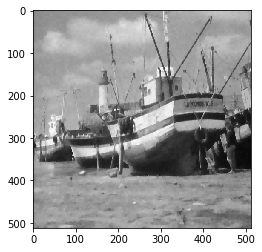

In [44]:
for i, r in enumerate(results):
    if (i%10==0 or True):
        plt.imshow(r, 'gray')
        plt.imsave(str(i)+'shit.png', r, cmap='gray')

In [8]:
dx.shape

(512, 512)